# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap # install "umap-learn" instead of "umap"
import seaborn as sns
from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA

from time import time

In [2]:
cleaned = pd.read_csv('batchcorrected_log2cpm.tsv', sep = '\t', index_col = [0])
cleaned = cleaned.transpose()
cleaned.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
100_2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,5.377653,...,1.145577,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373
101_3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,5.255156,...,1.189183,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671
102_2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,5.145699,...,0.915614,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135
103_3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,5.140274,...,0.850755,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008
104_2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,5.069410,...,0.647376,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005


In [3]:
cleaned.shape

(453, 18053)

In [4]:
retina = pd.read_csv('meta_retina.csv', index_col = [0])
retina.head()

,sample_id,donor,unique_id,rnaseq_id,genotype_id,michigan_id,A69S_rs10490924,Y402H_rs1061170,os_od,age,...,rin,nandrop_rna_ng_per_ul,rna_500ng,water,library_prep_date,library_index,library_submitted_date,library_sequenced_date,library_prepper,postmortem_interval_hrs
r_id,,,,,,,,,,,,,,,,,,,,,
1_2,1,08-1521,08-1521-1,R42015-419pf_08-1521-1-IR,1-08-1521_OD@68524,1-08-1521,G/T,C/T,OD,61.0,...,NaN,NaN,6.3,243.7,12/3/15,27,12/10/15,1/29/16,MRS,19.00
2_1,2,08-1404,08-1404-2,R42016-085pf_08-1404-2-IR,2-08-1404_OS@68525,2-08-1404,G/T,C/T,OS,77.0,...,7.6,NaN,2.1,247.9,3/3/16,1,3/8/16,3/8/16,RRP,22.77
3_1,3,08-1312,08-1312-3,R42016-086pf_08-1312-3-IR,3-08-1312_OS@68526,3-08-1312,T/T,T/T,OS,81.0,...,7.6,NaN,1.7,248.3,3/3/16,3,3/8/16,3/8/16,RRP,22.22
4_1,4,08-1448,08-1448-4,R42016-087pf_08-1448-4-IR,4-08-1448_OS@68527,4-08-1448,G/T,T/T,OS,88.0,...,6.5,NaN,2.5,247.5,3/3/16,8,3/8/16,3/8/16,RRP,23.93
5_1,5,08-1451,08-1451-5,R42016-088pf_08-1451-5-IR,5-08-1451_OS@68528,5-08-1451,G/T,T/T,OS,75.0,...,6.4,NaN,8.9,241.1,3/3/16,9,3/8/16,3/8/16,RRP,22.35


In [5]:
sub_retina = pd.DataFrame(retina,columns = ['age','sex','rna_isolation_batch','library_prepper'])
sub_retina.head()

,age,sex,rna_isolation_batch,library_prepper
r_id,,,,
1_2,61.0,M,isobatch1,MRS
2_1,77.0,F,isobatch1,RRP
3_1,81.0,F,isobatch1,RRP
4_1,88.0,F,isobatch1,RRP
5_1,75.0,F,isobatch1,RRP


In [6]:
sub_retina.shape

(523, 4)

In [7]:
#merge two frame 
df = sub_retina.join(cleaned)
#df.shape -- (523,18057)
df.head()

,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
1_2,61.0,M,isobatch1,MRS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
3_1,81.0,F,isobatch1,RRP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
5_1,75.0,F,isobatch1,RRP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop rows with NaN to clean the dataframe
fclean = df.dropna(axis=0,how='any')
fclean.shape # --(453,18057 )
fclean.head()

,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,73.0,F,isobatch1,RRP,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,89.0,F,isobatch1,RRP,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
8_2,72.0,F,isobatch1,MRS,4.322620,4.428162,4.772258,3.835178,1.740931,4.706419,...,0.979581,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421


In [9]:
#sperate fclean into different frames using differenrt standard
batchone = fclean.loc[fclean['rna_isolation_batch'] == 'isobatch1']
batchone.shape #--(137,18057)
batchtwo = fclean.loc[fclean['rna_isolation_batch'] == 'isobatch2']
batchtwo.shape #--(316,18057)
batch1 = batchone.drop(['age', 'sex','rna_isolation_batch','library_prepper'], axis=1)
batch1.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,3.593464,5.479866,5.704291,4.974509,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,3.395882,4.909227,5.867000,5.261241,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,3.588055,5.279591,5.804916,5.262013,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,3.755399,5.034120,5.531545,5.163387,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
8_2,4.322620,4.428162,4.772258,3.835178,1.740931,4.706419,3.355962,5.321214,5.926948,5.281716,...,0.979581,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421


In [10]:
genderone = fclean.loc[fclean['sex'] == 'F']
genderone.shape #--(244,18057)
female = genderone.drop(['age', 'sex','rna_isolation_batch','library_prepper'], axis=1)
female.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,3.593464,5.479866,5.704291,4.974509,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,3.395882,4.909227,5.867000,5.261241,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,3.588055,5.279591,5.804916,5.262013,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,3.755399,5.034120,5.531545,5.163387,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
8_2,4.322620,4.428162,4.772258,3.835178,1.740931,4.706419,3.355962,5.321214,5.926948,5.281716,...,0.979581,2.732431,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421


In [11]:
libraryone = fclean.loc[fclean['library_prepper'] == 'RRP']
libraryone.shape #--(291,18057)
library1 = libraryone.drop(['age', 'sex','rna_isolation_batch','library_prepper'], axis=1)
library1.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,3.593464,5.479866,5.704291,4.974509,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
4_1,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,3.395882,4.909227,5.867000,5.261241,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
6_1,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,3.588055,5.279591,5.804916,5.262013,...,1.104536,2.742894,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712
7_3,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,3.755399,5.034120,5.531545,5.163387,...,0.717096,2.953383,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396
9_1,4.292881,4.497315,4.867226,4.344281,1.407082,3.630078,3.654724,5.644832,5.954186,5.186914,...,0.818413,3.047489,1.390206,2.354655,0.816323,0.205111,1.462163,0.875158,1.087222,1.708487


# Seperate batch and plot only for isobatch1

In [12]:
# Divide cleaned data into 4 group according to AMD stages
b1_1 = batch1[batch1.index.str.contains('_1')]
b1_2 = batch1[batch1.index.str.contains('_2')]
b1_3 = batch1[batch1.index.str.contains('_3')]
b1_4 = batch1[batch1.index.str.contains('_4')]
X = np.vstack([b1_1, b1_2, b1_3, b1_4])

label_stage1 = np.zeros(len(b1_1))
label_stage2 = np.ones(len(b1_2))
label_stage3 = np.full(len(b1_3), 2)
label_stage4 = np.full(len(b1_4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

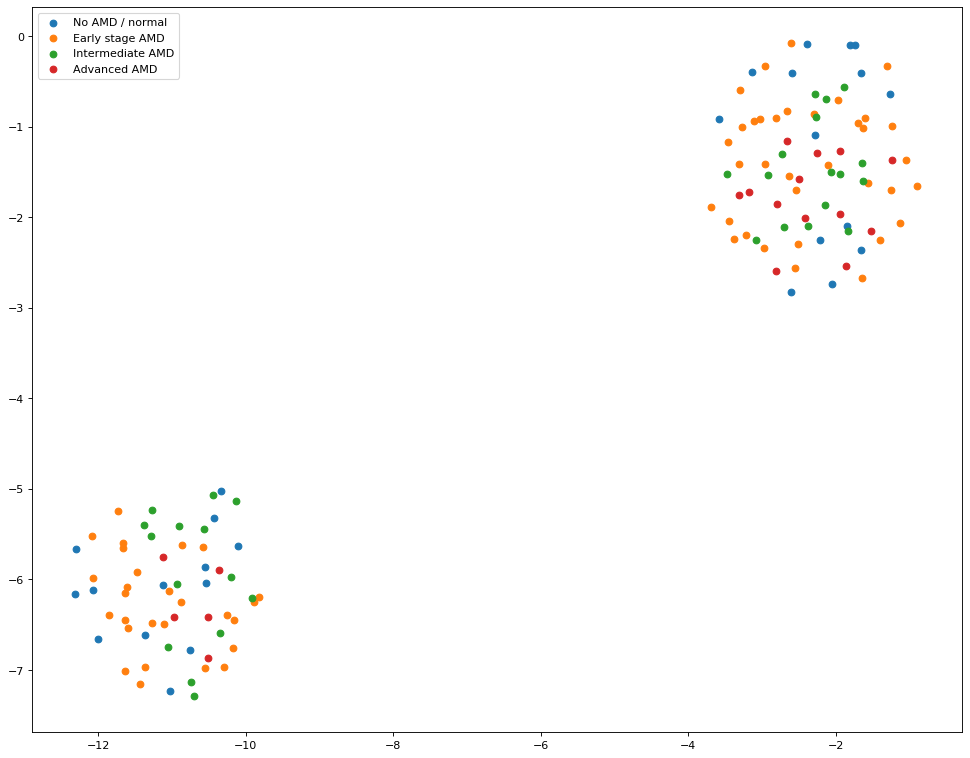

In [13]:
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()

# Seperate gender and plot only for female

In [14]:
# Divide cleaned data into 4 group according to AMD stages
f1 = female[female.index.str.contains('_1')]
f2 = female[female.index.str.contains('_2')]
f3 = female[female.index.str.contains('_3')]
f4 = female[female.index.str.contains('_4')]
X = np.vstack([f1, f2, f3, f4])

label_stage1 = np.zeros(len(f1))
label_stage2 = np.ones(len(f2))
label_stage3 = np.full(len(f3), 2)
label_stage4 = np.full(len(f4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

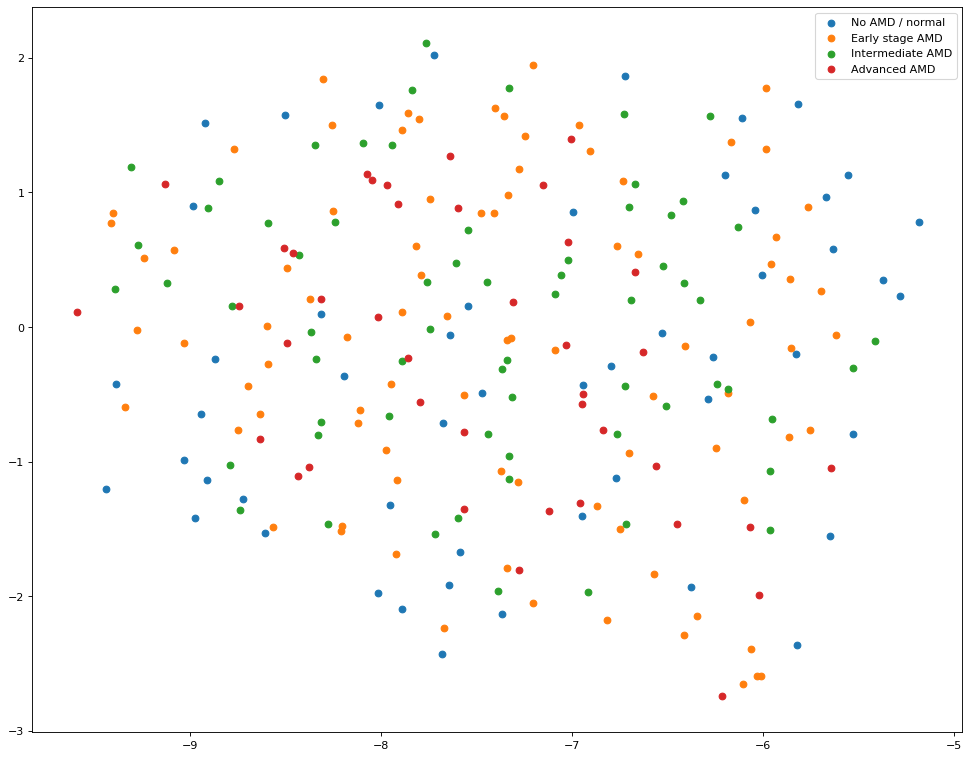

In [15]:
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()

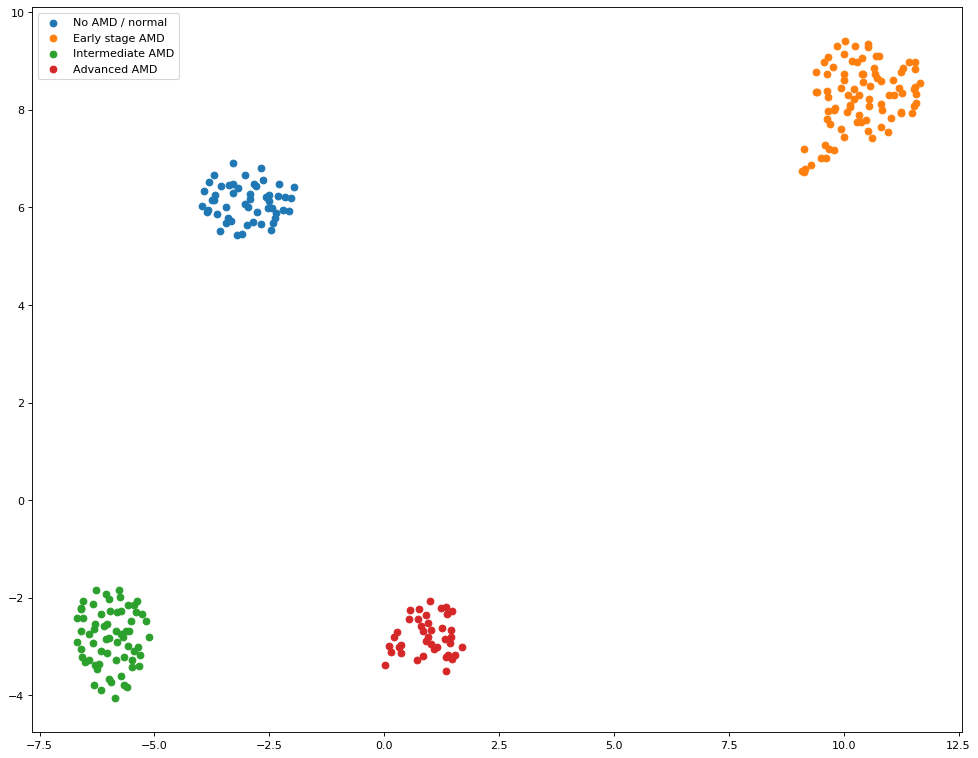

In [16]:
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X,y)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()

# seperate library prepper and plot o

In [17]:
# Divide cleaned data into 4 group according to AMD stages
l1 = library1[library1.index.str.contains('_1')]
l2 = library1[library1.index.str.contains('_2')]
l3 = library1[library1.index.str.contains('_3')]
l4 = library1[library1.index.str.contains('_4')]
X = np.vstack([l1, l2, l3, l4])

label_stage1 = np.zeros(len(l1))
label_stage2 = np.ones(len(l2))
label_stage3 = np.full(len(l3), 2)
label_stage4 = np.full(len(l4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

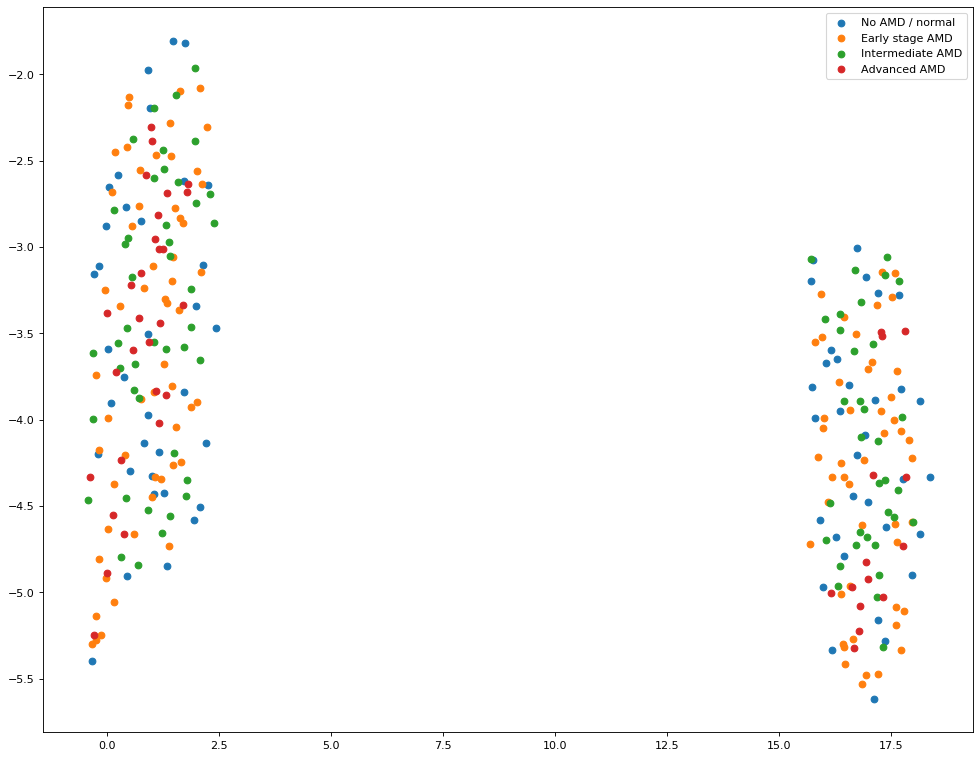

In [18]:
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()